
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_13.1
## ( A30-34.h5 `loss` and `[metrics]` Functions )
---

# Venture Funding with Deep Learning


In [133]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# import matplotlib.pyplot as plt
import hvplot.pandas as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 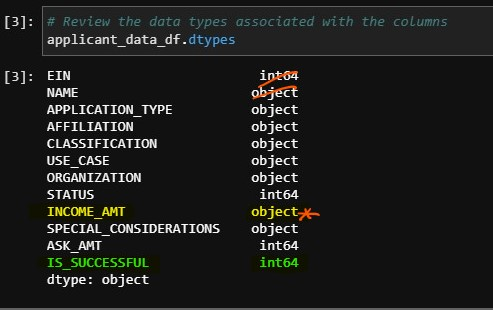

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 10+

In [116]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [117]:
# Define the number of neurons in the output layer
number_output_neurons_A10 = 1

In [118]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A10 =  (number_input_features + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A10

114

In [120]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A10 =  (hidden_nodes_layer1_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A10

57

In [121]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A10 =  (hidden_nodes_layer2_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A10

57

In [122]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A10 =  (hidden_nodes_layer3_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A10

57

In [124]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A10 =  (hidden_nodes_layer4_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A10

29

In [125]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A10 =  (hidden_nodes_layer5_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A10

29

In [126]:
# Create and Display the Sequential Model Instance 
# for Model A10
nn_A10 = Sequential() 

# Add the first hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer1_A10, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer2_A10, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer3_A10, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer4_A10, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer5_A10, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer6_A10, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A10.add(Dense(units=number_output_neurons_A10, activation="sigmoid"))

# Display the Sequential model summary
nn_A10.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_36 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_37 (Dense)             (None, 57)                3306      
_________________________________________________________________
dense_38 (Dense)             (None, 57)                3306      
_________________________________________________________________
dense_39 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_40 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

In [127]:
# Compile the Sequential model
nn_A10.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [128]:
# Fit the model using 50 epochs and the training data
fit_model_A10 = nn_A10.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2057 - accuracy: 0.6945 - val_loss: 0.1837 - val_accuracy: 0.7396
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1894 - accuracy: 0.7240 - val_loss: 0.1850 - val_accuracy: 0.7384
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1882 - accuracy: 0.7230 - val_loss: 0.1818 - val_accuracy: 0.7400
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1858 - accuracy: 0.7268 - val_loss: 0.1821 - val_accuracy: 0.7387
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.7357 - val_loss: 0.1822 - val_accuracy: 0.7381
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.7343 - val_loss: 0.1820 - val_accuracy: 0.7418
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1797 - accuracy: 0.7379 - val_loss: 0.1824 - val_accuracy: 0.7405

In [129]:
print("Alternative Model 10 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A10.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 10 Results
Loss: 0.18709281086921692, Accuracy: 0.7281632423400879


# Alternative Model 11+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A11 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A11 =  (number_input_features + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A11

114

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A11 =  (hidden_nodes_layer1_A11 + number_output_neurons_A11) // 2
hidden_nodes_layer2_A11 = hidden_nodes_layer1_A11

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A11

114

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A11 =  (hidden_nodes_layer2_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A11

114

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A11 =  (hidden_nodes_layer3_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A11

114

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A11 =  (hidden_nodes_layer4_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A11

114

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A11 = (hidden_nodes_layer5_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A11

57

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A11
nn_A11 = Sequential() 

# Add the first hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer1_A11, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer2_A11, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer3_A11, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer4_A11, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer5_A11, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer6_A11, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A11.add(Dense(units=number_output_neurons_A11, activation="sigmoid"))

# Display the Sequential model summary
nn_A11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_8 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_9 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_10 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_11 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_12 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A11.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A11 = nn_A11.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2048 - accuracy: 0.6866 - val_loss: 0.1859 - val_accuracy: 0.7365
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1887 - accuracy: 0.7291 - val_loss: 0.1822 - val_accuracy: 0.7410
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.7260 - val_loss: 0.1828 - val_accuracy: 0.7392
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1854 - accuracy: 0.7292 - val_loss: 0.1831 - val_accuracy: 0.7374
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1855 - accuracy: 0.7287 - val_loss: 0.1834 - val_accuracy: 0.7387
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.7323 - val_loss: 0.1826 - val_accuracy: 0.7368
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.7300 - val_loss: 0.1831 - val_accuracy: 0.7403

In [41]:
print("Alternative Model 11 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A11.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 11 Results
Loss: 0.18793152272701263, Accuracy: 0.72967928647995


# Alternative Model 12+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A12 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A12 =  (number_input_features + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A12

114

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A12 =  (hidden_nodes_layer1_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A12

114

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A12 =  (hidden_nodes_layer2_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A12

114

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A12 =  (hidden_nodes_layer3_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A12

114

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A12 =  (hidden_nodes_layer4_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A12

57

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A12 =  (hidden_nodes_layer5_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A12

29

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A12
nn_A12 = Sequential() 

# Add the first hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer1_A12, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer2_A12, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer3_A12, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer4_A12, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer5_A12, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer6_A12, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A12.add(Dense(units=number_output_neurons_A12, activation="sigmoid"))

# Display the Sequential model summary
nn_A12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_15 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_16 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_17 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_18 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_19 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A12.compile(loss="mse", optimizer="adam", metrics=["linear"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A12 = nn_A12.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.7001 - val_loss: 0.1851 - val_accuracy: 0.7381
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1862 - accuracy: 0.7311 - val_loss: 0.1823 - val_accuracy: 0.7367
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1857 - accuracy: 0.7307 - val_loss: 0.1830 - val_accuracy: 0.7400
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.7322 - val_loss: 0.1870 - val_accuracy: 0.7374
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.7332 - val_loss: 0.1838 - val_accuracy: 0.7375
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1822 - accuracy: 0.7346 - val_loss: 0.1833 - val_accuracy: 0.7407
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.7337 - val_loss: 0.1846 - val_accuracy: 0.7350

In [53]:
print("Alternative Model 12 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A12.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 12 Results
Loss: 0.18755090236663818, Accuracy: 0.7302623987197876


# Alternative Model 13+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A13 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A13 =  (number_input_features + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A13

114

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A13 =  (hidden_nodes_layer1_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A13

114

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A13 =  (hidden_nodes_layer2_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A13

114

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A13 =  (hidden_nodes_layer3_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A13

57

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A13 =  (hidden_nodes_layer4_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A13

29

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A13 =  (hidden_nodes_layer5_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A13

15

In [62]:
# Create and Display the Sequential Model Instance 
# for Model A13
nn_A13 = Sequential() 

# Add the first hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer1_A13, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer2_A13, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer3_A13, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer4_A13, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer5_A13, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer6_A13, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A13.add(Dense(units=number_output_neurons_A13, activation="sigmoid"))

# Display the Sequential model summary
nn_A13.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_22 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_23 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_24 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_25 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_26 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [63]:
# Compile the Sequential model
nn_A13.compile(loss="ema", optimizer="adam", metrics=["accuracy"])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A13 = nn_A13.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.7003 - val_loss: 0.1836 - val_accuracy: 0.7375
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1891 - accuracy: 0.7254 - val_loss: 0.1836 - val_accuracy: 0.7381
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.7272 - val_loss: 0.1838 - val_accuracy: 0.7380
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1828 - accuracy: 0.7368 - val_loss: 0.1836 - val_accuracy: 0.7380
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1842 - accuracy: 0.7272 - val_loss: 0.1833 - val_accuracy: 0.7359
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1835 - accuracy: 0.7317 - val_loss: 0.1838 - val_accuracy: 0.7361
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1833 - accuracy: 0.7346 - val_loss: 0.1827 - val_accuracy: 0.7392

In [65]:
print("Alternative Model 13 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A13.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 13 Results
Loss: 0.18706020712852478, Accuracy: 0.7292128205299377


# Alternative Model 14+

In [66]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [67]:
# Define the number of neurons in the output layer
number_output_neurons_A14 = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A14 =  (number_input_features + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A14

114

In [69]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A14 =  (hidden_nodes_layer1_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A14

114

In [70]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A14 =  (hidden_nodes_layer2_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A14

57

In [71]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A14 =  (hidden_nodes_layer3_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A14

29

In [72]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A14 =  (hidden_nodes_layer4_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A14

15

In [73]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A14 =  (hidden_nodes_layer5_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A14

8

In [74]:
# Create and Display the Sequential Model Instance 
# for Model A14
nn_A14 = Sequential() 

# Add the first hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer1_A14, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer2_A14, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer3_A14, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer4_A14, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer5_A14, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer6_A14, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A14.add(Dense(units=number_output_neurons_A14, activation="sigmoid"))

# Display the Sequential model summary
nn_A14.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_29 (Dense)             (None, 114)               13110     
_________________________________________________________________
dense_30 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_31 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_32 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [75]:
# Compile the Sequential model
nn_A14.compile(loss="ema", optimizer="adam", metrics=["mse"])

In [76]:
# Fit the model using 50 epochs and the training data
fit_model_A14 = nn_A14.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.6922 - val_loss: 0.1840 - val_accuracy: 0.7367
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1876 - accuracy: 0.7305 - val_loss: 0.1821 - val_accuracy: 0.7389
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1881 - accuracy: 0.7243 - val_loss: 0.1843 - val_accuracy: 0.7384
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1847 - accuracy: 0.7317 - val_loss: 0.1816 - val_accuracy: 0.7415
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1857 - accuracy: 0.7288 - val_loss: 0.1821 - val_accuracy: 0.7402
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.7306 - val_loss: 0.1824 - val_accuracy: 0.7384
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.7264 - val_loss: 0.1834 - val_accuracy: 0.7394

In [77]:
print("Alternative Model 14 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A14.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 14 Results
Loss: 0.1879236102104187, Accuracy: 0.7303789854049683


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [78]:
print("Alternative Model 10 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A10.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 10 Results
Loss: 0.18749623000621796, Accuracy: 0.7294460535049438


<AxesSubplot:title={'center':'model_accuracy: A10'}>

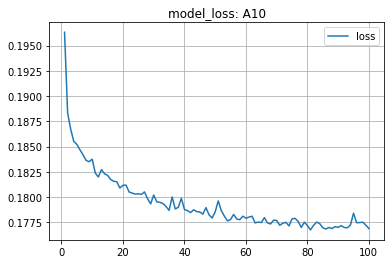

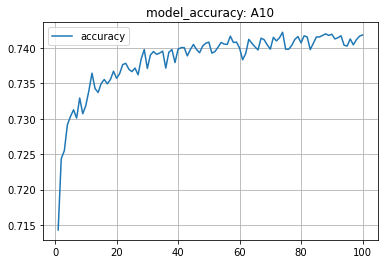

In [79]:
model_plot = pd.DataFrame(fit_model_A10.history, index=range(1, len(fit_model_A10.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A10")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A10")

In [80]:
print("Alternative Model 11 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A11.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 11 Results
Loss: 0.18793152272701263, Accuracy: 0.72967928647995


<AxesSubplot:title={'center':'model_accuracy: A11'}>

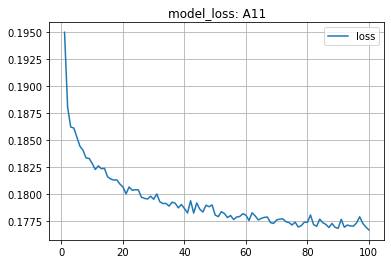

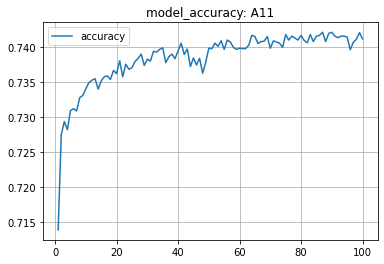

In [81]:
model_plot = pd.DataFrame(fit_model_A11.history, index=range(1, len(fit_model_A11.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A11")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A11")

In [82]:
print("Alternative Model 12 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A12.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 12 Results
Loss: 0.18755090236663818, Accuracy: 0.7302623987197876


<AxesSubplot:title={'center':'model_accuracy: A12'}>

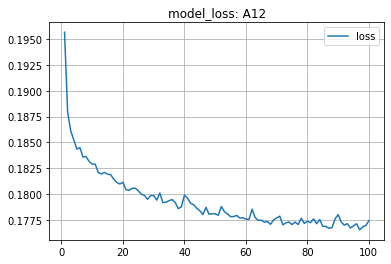

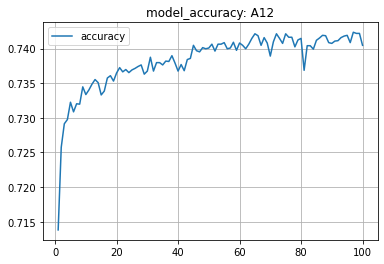

In [83]:
model_plot = pd.DataFrame(fit_model_A12.history, index=range(1, len(fit_model_A12.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A12")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A12")

In [84]:
print("Alternative Model 13 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A13.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 13 Results
Loss: 0.18706020712852478, Accuracy: 0.7292128205299377


<AxesSubplot:title={'center':'model_accuracy: A13'}>

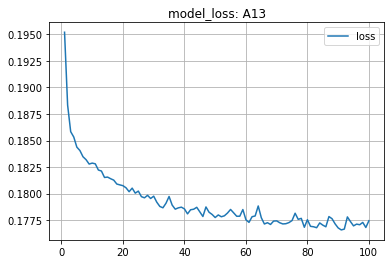

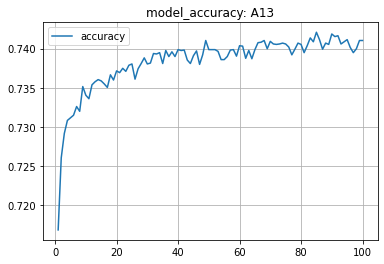

In [85]:
model_plot = pd.DataFrame(fit_model_A13.history, index=range(1, len(fit_model_A13.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A13")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A13")

In [86]:
print("Alternative Model 14 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A14.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 14 Results
Loss: 0.1879236102104187, Accuracy: 0.7303789854049683


<AxesSubplot:title={'center':'model_accuracy: A14'}>

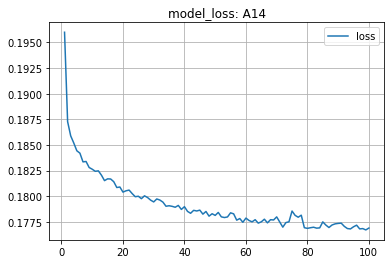

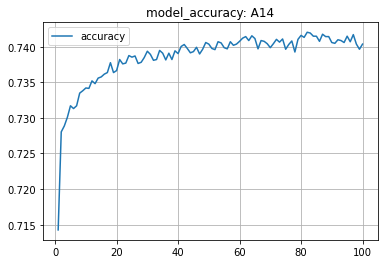

In [87]:
model_plot = pd.DataFrame(fit_model_A14.history, index=range(1, len(fit_model_A14.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A14", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A14", grid=True)

### Step 2(b): Plot and Compare the Results of each Alternative Model

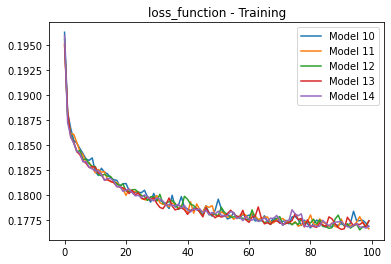

In [115]:
# Day 14-2 cell [62]
plt.plot(fit_model_A10.history["loss"])
plt.plot(fit_model_A11.history["loss"])
plt.plot(fit_model_A12.history["loss"])
plt.plot(fit_model_A13.history["loss"])
plt.plot(fit_model_A14.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Model 10",
            "Model 11",
            "Model 12",
            "Model 13",
            "Model 14"
           ])
plt.show()

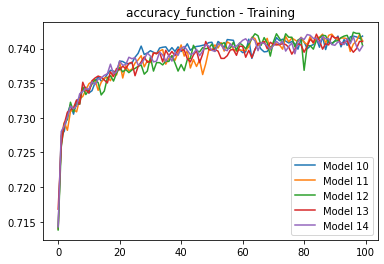

In [130]:
# Day 14-2 cell [62]
plt.plot(fit_model_A10.history["accuracy"])
plt.plot(fit_model_A11.history["accuracy"])
plt.plot(fit_model_A12.history["accuracy"])
plt.plot(fit_model_A13.history["accuracy"])
plt.plot(fit_model_A14.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Model 10",
            "Model 11",
            "Model 12",
            "Model 13",
            "Model 14"
           ])
plt.show()

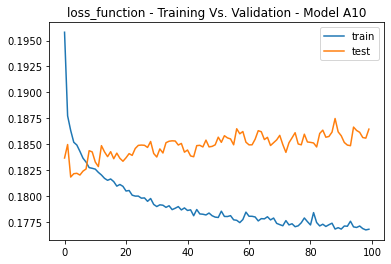

In [131]:
# Train vs test for shallow net
plt.plot(fit_model_A10.history["loss"])
plt.plot(fit_model_A10.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A10")
plt.legend(["train", "test"])
plt.show()

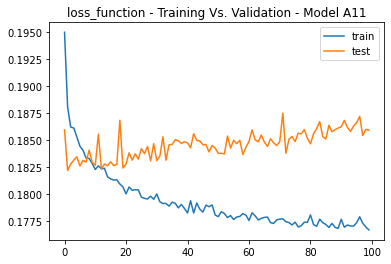

In [91]:
# Train vs test for deep net
plt.plot(fit_model_A11.history["loss"])
plt.plot(fit_model_A11.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A11")
plt.legend(["train", "test"])
plt.show()

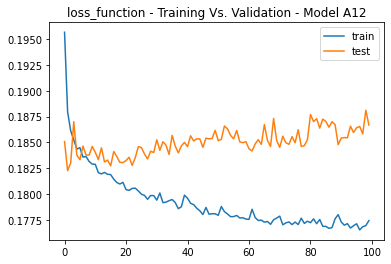

In [92]:
# Train vs test for deep net
plt.plot(fit_model_A12.history["loss"])
plt.plot(fit_model_A12.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A12")
plt.legend(["train", "test"])
plt.show()

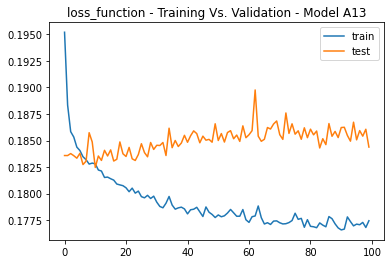

In [93]:
# Train vs test for deep net
plt.plot(fit_model_A13.history["loss"])
plt.plot(fit_model_A13.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A13")
plt.legend(["train", "test"])
plt.show()

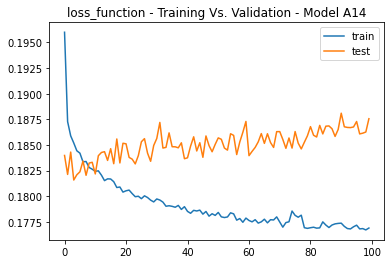

In [94]:
# Train vs test for deep net
plt.plot(fit_model_A14.history["loss"])
plt.plot(fit_model_A14.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A14")
plt.legend(["train", "test"])
plt.show()

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [95]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A30.h5")
# Export your model to a HDF5 file
nn_A10.save(file_path)

In [96]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A31.h5")
# Export your model to a HDF5 file
nn_A11.save(file_path)

In [97]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A32.h5")
# Export your model to a HDF5 file
nn_A12.save(file_path)

In [98]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A33.h5")
# Export your model to a HDF5 file
nn_A13.save(file_path)

In [99]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A34.h5")
# Export your model to a HDF5 file
nn_A14.save(file_path)